In [1]:
import pandas as pd
import numpy as np

In [3]:
pwd

'C:\\Users\\Jonat\\DAT-10-19\\ClassMaterial\\Unit2\\Class9'

In [5]:
df = pd.read_csv('../data/restaurants.csv', parse_dates=['visit_date'])

In [6]:
df.head()

,id,visit_date,visitors,calendar_date,day_of_week,holiday,genre,area,latitude,longitude,reserve_visitors
0,air_ba937bf13d40fb24,2016-01-13,25,2016-01-13,Wednesday,0,Dining bar,Tōkyō-to Minato-ku Shibakōen,35.658068,139.751599,NaN
1,air_ba937bf13d40fb24,2016-01-14,32,2016-01-14,Thursday,0,Dining bar,Tōkyō-to Minato-ku Shibakōen,35.658068,139.751599,NaN
2,air_ba937bf13d40fb24,2016-01-15,29,2016-01-15,Friday,0,Dining bar,Tōkyō-to Minato-ku Shibakōen,35.658068,139.751599,NaN
3,air_ba937bf13d40fb24,2016-01-16,22,2016-01-16,Saturday,0,Dining bar,Tōkyō-to Minato-ku Shibakōen,35.658068,139.751599,NaN
4,air_ba937bf13d40fb24,2016-01-18,6,2016-01-18,Monday,0,Dining bar,Tōkyō-to Minato-ku Shibakōen,35.658068,139.751599,NaN


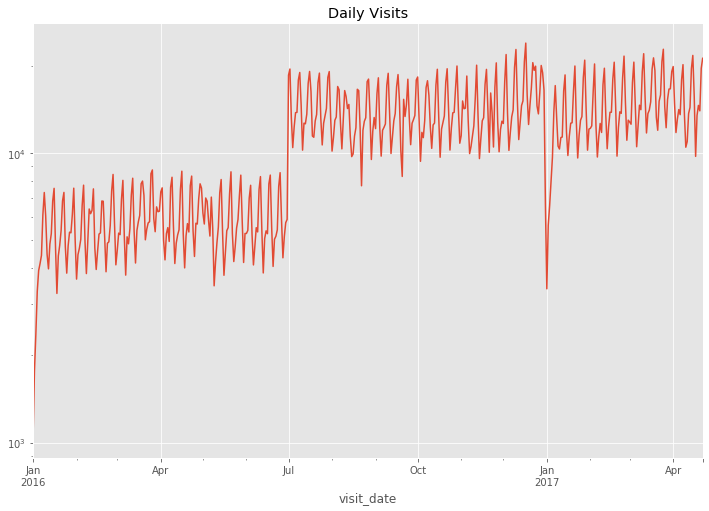

In [19]:
import matplotlib.pyplot as plt
df.groupby('visit_date')['visitors'].sum().plot(figsize=(12, 8), title='Daily Visits', logy=True);

In [14]:
plt.style.available
plt.style.use('ggplot')

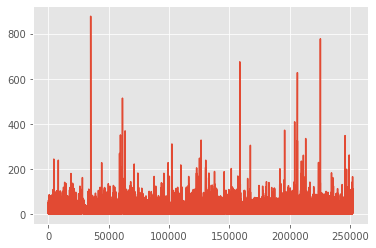

In [17]:
df['visitors'].plot()

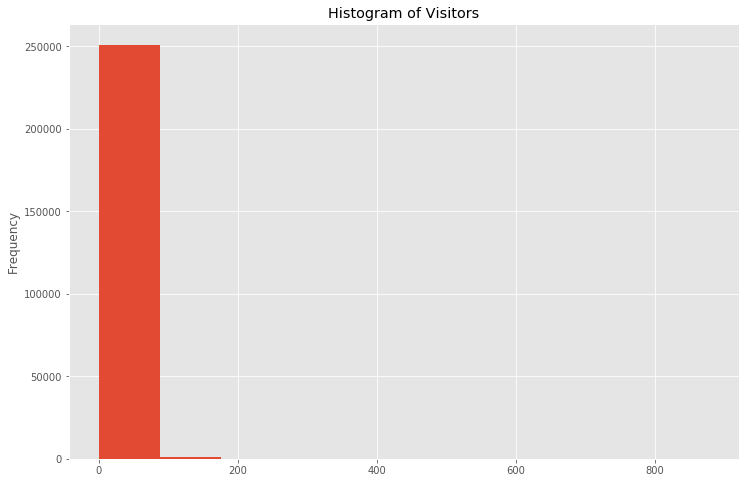

In [18]:
df['visitors'].plot(kind='hist', title='Histogram of Visitors', figsize=(12, 8))

In [21]:
# this is the low-level api
import plotly.graph_objects as go
import plotly.express as px

In [22]:
fig1 = go.Figure()

In [24]:
data = df.groupby(['visit_date', 'day_of_week'])['visitors'].sum().reset_index()

In [27]:
fig1.add_trace(go.Scatter(x=data['visit_date'], y=data['visitors']))

In [42]:
fig2 = px.line(data, x='visit_date', y='visitors', title='Visitors by Day', color='day_of_week')

In [41]:
fig1 = go.Figure()
for day in data.day_of_week.unique():
    fig1.add_trace(go.Scatter(x=data[data.day_of_week == day]['visit_date'], y=data[data.day_of_week == day]['visitors']))
fig1.update_layout(title='Our Chart Title')

In [43]:
fig2

In [46]:
fig2.update_layout(title="Our New Title")

In [50]:
# create a grouping for the chart
data = df.groupby('visit_date')[['visitors', 'reserve_visitors']].sum().reset_index()
# create a column for day of the week to use for later charts
data['day'] = data.visit_date.dt.day_name()
# simple scatter chart
px.scatter(data, x='visitors', y='reserve_visitors', animation_frame='day')

In [51]:
pd.options.plotting.backend = "plotly"

In [55]:
df.groupby(['visit_date', 'genre'])[['visitors']].sum().reset_index().plot(x='visit_date', y='visitors', animation_frame='genre')